In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
from dinosim.spacecraft import DINO
from dinosim.bodies import Planet

In [124]:
earth = Planet(center_x=0, center_y=0, radius = 60, name='earth')
moon = Planet(center_x=384, center_y=0, radius= 10, name='moon') # Thousands of kilometers
planets = [earth, moon]

# Define Satellites
Here we're going to set generalizable comms params which we can use for a number of satellites. 

In [162]:
# Let's say we want satellites in increments of 15 degrees about earth 
separation_degrees = 10
satellite_altitude = 35 # Thousands of kilometers, so 
satellite_separation = np.arange(0, 360, separation_degrees)
num_satellites = len(satellite_separation)

# Comms properties 
transmit_power_dBm = 66.99
frequency_hz = 1.5e9 # 1.5GHz
frequency_hz = 4.2e9 # 4.2GHz
antenna_gain_dB = 10

sats = [] 

for i in range(num_satellites): 
    single_sat = DINO(name=f'Sat {i}', orbiting_body=earth, altitude=satellite_altitude, angle_global=satellite_separation[i], pointing_angle=0)
    single_sat.set_comm_params(transmit_power_dBm, frequency_hz, antenna_gain_dB)
    sats.append(single_sat)

# Perform Visualizations

In [163]:
from dinosim.visualizations import plot_planets_and_spacecraft, plot_received_power_field, plot_best_received_power_field, plot_min_satellite_acquisition

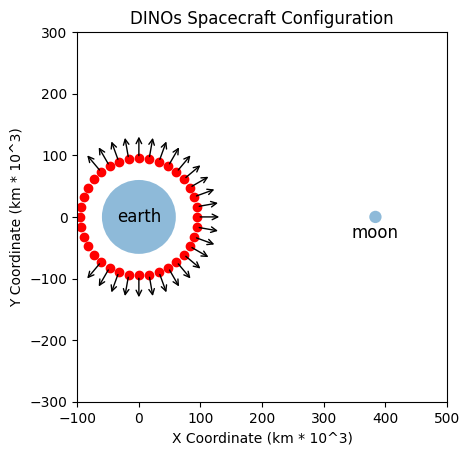

In [164]:
plot_planets_and_spacecraft(planets, sats)

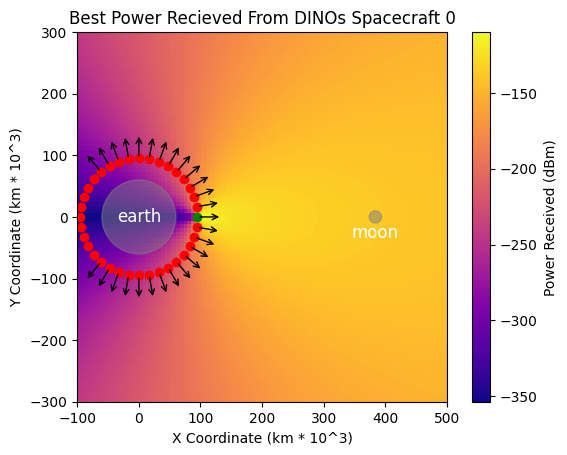

In [165]:
plot_received_power_field(planets, sats, 0, antenna_correction=True)

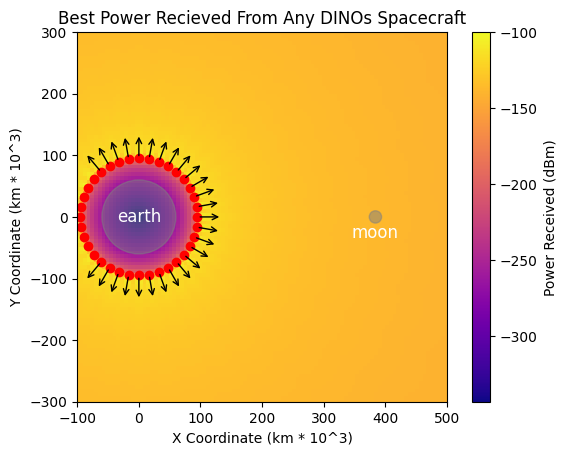

In [166]:
plot_best_received_power_field(planets, sats, antenna_correction=True)

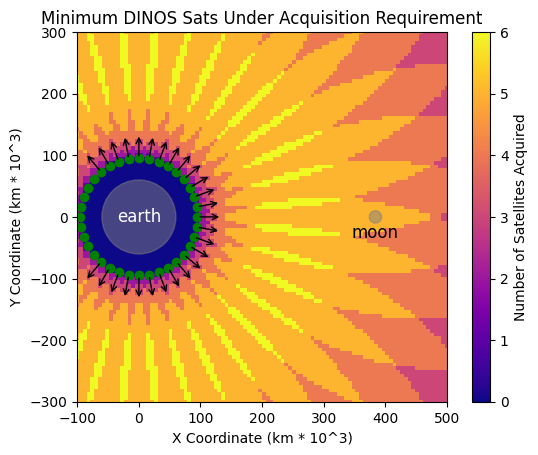

In [175]:
plot_min_satellite_acquisition(planets, sats, min_power=-144, antenna_correction=True)